# Topic: Project 1
# Subject: Exploratory Data Analysis (EDA) of MTA turnstile data
# Date: 10/09/2021
# Name: Fatimah Alqahtani

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
from sqlite3 import connect
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sqlalchemy import create_engine
engine = create_engine("sqlite:///turnstile.db")

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210925, 210918, 210911, 210904, 210828, 210821, 210814, 210807, 210731, 210724, 210717, 210710, 210703]# take file data 
Newuture  = get_data(week_nums)

In [5]:
#Write object to a comma-separated values (csv) file.
Newuture.to_csv('data.csv',index =False)

Print Working Directory or path

In [6]:
pwd

'C:\\Users\\hp\\Project'

Read SQL query or database table into a DataFrame


In [7]:
connect=connect(":memory:")
Newuture.to_sql('data',connect)
Newuture=pd.read_sql('SELECT * FROM data',connect)
Newuture

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
...,...,...,...,...,...,...,...,...,...,...,...,...
2724413,209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585
2724414,209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585
2724415,209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585
2724416,209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585


# Data display and summary

In [8]:
#Checking DataFrame's first 10 rows
Newuture.head(10)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,20:00:00,REGULAR,7637377,2613583
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/19/2021,00:00:00,REGULAR,7637440,2613598
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/19/2021,04:00:00,REGULAR,7637449,2613602
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/19/2021,08:00:00,REGULAR,7637454,2613612
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/19/2021,12:00:00,REGULAR,7637494,2613646


In [9]:
#Checking DataFrame's last 10 rows
Newuture.tail(10)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2724408,209820,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2021,09:00:00,REGULAR,5554,584
2724409,209821,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2021,13:00:00,REGULAR,5554,584
2724410,209822,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2021,17:00:00,REGULAR,5554,585
2724411,209823,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2021,21:00:00,REGULAR,5554,585
2724412,209824,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,01:00:00,REGULAR,5554,585
2724413,209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585
2724414,209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585
2724415,209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585
2724416,209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585
2724417,209829,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,21:00:00,REGULAR,5554,585


In [10]:
#Checking general info about dataframe
Newuture.info

<bound method DataFrame.info of           index    C/A  UNIT       SCP        STATION LINENAME DIVISION  \
0             0   A002  R051  02-00-00          59 ST  NQR456W      BMT   
1             1   A002  R051  02-00-00          59 ST  NQR456W      BMT   
2             2   A002  R051  02-00-00          59 ST  NQR456W      BMT   
3             3   A002  R051  02-00-00          59 ST  NQR456W      BMT   
4             4   A002  R051  02-00-00          59 ST  NQR456W      BMT   
...         ...    ...   ...       ...            ...      ...      ...   
2724413  209825  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
2724414  209826  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
2724415  209827  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
2724416  209828  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
2724417  209829  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   

               DATE      TIME     DESC  ENTRIES  \
0        09/18/2

In [11]:
#Checking describe about ENTRIES and EXITS
Newuture.describe()

,index,ENTRIES,EXITS
count,2.724418e+06,2.724418e+06,2.724418e+06
mean,1.047851e+05,4.148078e+07,3.317211e+07
std,6.049829e+04,2.181339e+08,1.916161e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.239200e+04,2.198380e+05,1.027980e+05
50%,1.047850e+05,1.396824e+06,8.526620e+05
75%,1.571770e+05,5.997710e+06,3.971601e+06
max,2.103990e+05,2.147407e+09,2.133797e+09


In [12]:
#Checking DataFrame size
Newuture.shape

(2724418, 12)

In [13]:
#Checking null values based on columns
Newuture.isna().sum()

index                                                                   0
C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [14]:
#Checking STATION columns value's counts
Newuture.STATION.value_counts()

34 ST-PENN STA     55390
FULTON ST          52351
GRD CNTRL-42 ST    49709
23 ST              39859
86 ST              35421
                   ...  
SHEPHERD AV         1625
KOSCIUSZKO ST       1623
PRESIDENT ST        1622
SUTTER AV           1092
CLEVELAND ST        1090
Name: STATION, Length: 379, dtype: int64

In [15]:
# Checking columns names
Newuture.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

# Data cleaning and analysis

In [16]:
# Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"

Newuture['DATETIME'] = Newuture["DATE"]+ " " + Newuture["TIME"]

Newuture['DATETIME'] = pd.to_datetime(Newuture['DATETIME'], format='%m/%d/%Y %H:%M:%S')

Newuture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724418 entries, 0 to 2724417
Data columns (total 13 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   index                                                                 int64         
 1   C/A                                                                   object        
 2   UNIT                                                                  object        
 3   SCP                                                                   object        
 4   STATION                                                               object        
 5   LINENAME                                                              object        
 6   DIVISION                                                              object        
 7   DATE                                                                  ob

In [17]:
# Check the head 
Newuture.head(1)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18


In [18]:
#Create a column that called "NAMEOFDAY"
Newuture["NAMEOFDAY"]= Newuture["DATETIME"].dt.day_name()

#Checking sample 5 rows
Newuture.sample(5)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NAMEOFDAY
1508047,40804,J007,R377,00-00-00,FLUSHING AV,JM,BMT,08/04/2021,17:00:00,REGULAR,17429026,11372600,2021-08-04 17:00:00,Wednesday
1142225,93641,N400A,R359,02-00-02,COURT SQ,EMG,IND,08/18/2021,04:00:00,REGULAR,10783,4609,2021-08-18 04:00:00,Wednesday
590481,170183,R261,R205,00-00-02,149/GRAND CONC,245,IRT,09/09/2021,12:00:00,REGULAR,1134551,869033,2021-09-09 12:00:00,Thursday
1291813,33814,H008,R248,01-00-03,1 AV,L,BMT,08/12/2021,20:00:00,REGULAR,205012,91399,2021-08-12 20:00:00,Thursday
2164462,68855,N122,R439,00-00-01,ROCKAWAY AV,C,IND,07/12/2021,13:00:00,REGULAR,3592953,2930302,2021-07-12 13:00:00,Monday


In [19]:
# devied the data set in to three interval based on time
Newuture["TIME_INTERVAL"] = (
         np.where(
             (Newuture.DATETIME.dt.hour <= 8), "0:00 to 8:00 "
                 ,np.where(
                     (Newuture.DATETIME.dt.hour <= 16), "9:00 to 16:00"
                         ,"17:00 to 24:00")))


In [20]:
Newuture

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NAMEOFDAY,TIME_INTERVAL
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00,Saturday,0:00 to 8:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,Saturday,0:00 to 8:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,Saturday,0:00 to 8:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,Saturday,9:00 to 16:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,Saturday,9:00 to 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724413,209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585,2021-07-02 05:00:00,Friday,0:00 to 8:00
2724414,209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585,2021-07-02 09:00:00,Friday,9:00 to 16:00
2724415,209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585,2021-07-02 13:00:00,Friday,9:00 to 16:00
2724416,209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585,2021-07-02 17:00:00,Friday,17:00 to 24:00


In [21]:
Newuture.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATETIME', 'NAMEOFDAY', 'TIME_INTERVAL'],
      dtype='object')

In [22]:
#Strip the whitespace from column headers
Newuture.columns = Newuture.columns.str.strip()

In [23]:
#str.strip()  function is used to remove or strip the leading and trailing space of the column in pandas dataframe. 
#Str.replace() function is used to strip all the spaces of the column in pandas
Newuture.columns = [column.strip() for column in Newuture.columns]
Newuture.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'DATETIME', 'NAMEOFDAY',
       'TIME_INTERVAL'],
      dtype='object')

In [24]:
# Working with only neccessary columns

Newuture =Newuture[["C/A", "UNIT", "SCP","STATION","DATETIME","ENTRIES","EXITS","NAMEOFDAY","TIME_INTERVAL"]]
Newuture.head(10)

#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(Newuture["DATETIME"].max())
print()
print("Minimum date: ")
print(Newuture["DATETIME"].min())

Maximum date: 
2021-09-24 23:57:20

Minimum date: 
2021-06-26 00:00:00


In [25]:
Newuture


,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,NAMEOFDAY,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,2021-09-18 00:00:00,7637026,2613455,Saturday,0:00 to 8:00
1,A002,R051,02-00-00,59 ST,2021-09-18 04:00:00,7637036,2613457,Saturday,0:00 to 8:00
2,A002,R051,02-00-00,59 ST,2021-09-18 08:00:00,7637047,2613478,Saturday,0:00 to 8:00
3,A002,R051,02-00-00,59 ST,2021-09-18 12:00:00,7637104,2613524,Saturday,9:00 to 16:00
4,A002,R051,02-00-00,59 ST,2021-09-18 16:00:00,7637236,2613561,Saturday,9:00 to 16:00
...,...,...,...,...,...,...,...,...,...
2724413,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-02 05:00:00,5554,585,Friday,0:00 to 8:00
2724414,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-02 09:00:00,5554,585,Friday,9:00 to 16:00
2724415,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-02 13:00:00,5554,585,Friday,9:00 to 16:00
2724416,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-02 17:00:00,5554,585,Friday,17:00 to 24:00


In [26]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(Newuture
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
2702968,S101,R070,00-00-02,ST. GEORGE,2021-09-16 08:00:00,2
2702884,S101,R070,00-00-02,ST. GEORGE,2021-09-02 16:00:00,2
2455849,R516,R291,00-00-00,33 ST-RAWSON ST,2021-08-24 16:00:00,2
1390007,N535,R220,00-00-01,CARROLL ST,2021-08-31 16:00:00,2
1389458,N535,R220,00-00-00,CARROLL ST,2021-08-31 16:00:00,2


In [27]:
# Get rid of the duplicate entry
Newuture.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)
Newuture.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)
Newuture

<ipython-input-27-f187b893d314>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newuture.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"],
<ipython-input-27-f187b893d314>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newuture.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)


,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,NAMEOFDAY,TIME_INTERVAL
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,5554,646,Friday,17:00 to 24:00
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,5554,646,Friday,17:00 to 24:00
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,5554,645,Friday,9:00 to 16:00
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,5554,645,Friday,9:00 to 16:00
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,5554,645,Friday,0:00 to 8:00
...,...,...,...,...,...,...,...,...,...
2514592,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2595791,Saturday,9:00 to 16:00
2514591,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2595762,Saturday,9:00 to 16:00
2514590,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2595729,Saturday,0:00 to 8:00
2514589,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2595713,Saturday,0:00 to 8:00


In [28]:
#make sure that the data are not duplicate
(Newuture
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,1
1816191,R139,R031,04-00-00,34 ST-PENN STA,2021-09-05 12:00:00,1
1816193,R139,R031,04-00-00,34 ST-PENN STA,2021-09-05 20:00:00,1
1816194,R139,R031,04-00-00,34 ST-PENN STA,2021-09-06 00:00:00,1
1816195,R139,R031,04-00-00,34 ST-PENN STA,2021-09-06 04:00:00,1


In [29]:
Newuture

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,NAMEOFDAY,TIME_INTERVAL
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,5554,646,Friday,17:00 to 24:00
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,5554,646,Friday,17:00 to 24:00
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,5554,645,Friday,9:00 to 16:00
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,5554,645,Friday,9:00 to 16:00
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,5554,645,Friday,0:00 to 8:00
...,...,...,...,...,...,...,...,...,...
2514592,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2595791,Saturday,9:00 to 16:00
2514591,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2595762,Saturday,9:00 to 16:00
2514590,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2595729,Saturday,0:00 to 8:00
2514589,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2595713,Saturday,0:00 to 8:00


In [30]:

Newuture_daily = (Newuture
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME","TIME_INTERVAL"],as_index=False)
                        .ENTRIES.first())

In [31]:
Newuture_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,TIME_INTERVAL,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,0:00 to 8:00,7592792
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,0:00 to 8:00,7592804
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,0:00 to 8:00,7592816
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,9:00 to 16:00,7592870
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,9:00 to 16:00,7592992


In [32]:
Newuture_daily[["PREV_DATETIME", "PREV_ENTRIES"]] = (Newuture_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATETIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-32-bb3c31a01279>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Newuture_daily[["PREV_DATETIME", "PREV_ENTRIES"]] = (Newuture_daily


In [33]:
Newuture_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,TIME_INTERVAL,ENTRIES,PREV_DATETIME,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,0:00 to 8:00,7592792,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,0:00 to 8:00,7592804,2021-06-26 00:00:00,7592792.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,0:00 to 8:00,7592816,2021-06-26 04:00:00,7592804.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,9:00 to 16:00,7592870,2021-06-26 08:00:00,7592816.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,9:00 to 16:00,7592992,2021-06-26 12:00:00,7592870.0


In [34]:
# Drop the rows for the earliest date in the df
Newuture_daily.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)

In [35]:
Newuture_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,TIME_INTERVAL,ENTRIES,PREV_DATETIME,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,0:00 to 8:00,7592804,2021-06-26 00:00:00,7592792.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,0:00 to 8:00,7592816,2021-06-26 04:00:00,7592804.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,9:00 to 16:00,7592870,2021-06-26 08:00:00,7592816.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,9:00 to 16:00,7592992,2021-06-26 12:00:00,7592870.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,17:00 to 24:00,7593116,2021-06-26 16:00:00,7592992.0


In [36]:
# Let's see how many stations have this problem

(Newuture_daily[Newuture_daily["ENTRIES"] < Newuture_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         544
A013  R081  01-06-01  49 ST                1
A014  R081  02-00-00  49 ST                1
A049  R088  02-05-00  CORTLANDT ST        24
A066  R118  00-00-00  CANAL ST           544
                                        ... 
R622  R123  00-00-00  FRANKLIN AV        553
R633  R068  00-00-01  VAN SICLEN AV        1
R646  R110  01-00-02  FLATBUSH AV-B.C      1
R730  R431  00-00-04  EASTCHSTER/DYRE    484
S101  R070  00-00-02  ST. GEORGE           6
Length: 225, dtype: int64

In [37]:
#Cumulative ,Rest,and  Revers Issue (Outliers for the first table)
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
Newuture_daily["DAILY_ENTRIES"] = Newuture_daily.apply(get_daily_counts, axis=1, max_counter=100000)

393216 1.0
5 150038.0
193 8049630.0
10 468616.0
167790067 702272.0
151 5610355.0
149 132517.0
35 9769328.0
33565227 188201.0
31 8724126.0
458766 2578.0
6 106396.0
164 150473.0
393216 728.0
66 3272795.0
64 124319.0
67 1605140.0
5671 4298891.0
0 117440512.0
83 367525.0
15848006 2216515.0
2216520 15848006.0
10487784 2024.0
2024 10487784.0
10 500619.0
327680 7577112.0
26 490316.0
67109632 14.0
327682 67109640.0
15 67109632.0
14 1198448.0
37 305512.0
46 5405537.0
23 705357551.0
16777220 1037161.0
6 16034831.0
183 197843.0
458788 271020.0
327680 786526.0
327680 0.0
34 6214051.0
28 656520.0
37 1950780.0
173 15689534.0
7 558275.0
290 239100.0
176 114113.0
2718 174019.0
174023 2718.0
609994 1021.0
1195 609994.0
26911 332760.0
332770 26911.0
0 117404.0
0 182617.0
430827 73.0
5 430827.0
131640 408512.0
408706 131640.0
7 101752.0
101812 7.0
265384 54590.0
54602 265384.0
89 624773.0
6857 430115.0
430827 9370.0
9429 430827.0
75 226654.0
108 277883.0
4 118847.0
1 146227.0
70 319276.0
8 1255797.0
21 1

In [38]:
Newuture_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,TIME_INTERVAL,ENTRIES,PREV_DATETIME,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,0:00 to 8:00,7592804,2021-06-26 00:00:00,7592792.0,12.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,0:00 to 8:00,7592816,2021-06-26 04:00:00,7592804.0,12.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,9:00 to 16:00,7592870,2021-06-26 08:00:00,7592816.0,54.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,9:00 to 16:00,7592992,2021-06-26 12:00:00,7592870.0,122.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,17:00 to 24:00,7593116,2021-06-26 16:00:00,7592992.0,124.0


In [39]:
Newuture2_daily = (Newuture
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"],as_index=False)
                        .EXITS.first())

In [40]:
Newuture2_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,2595706
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,2595713
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,2595729
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,2595762
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,2595791


In [41]:
Newuture2_daily[["PREV_DATETIME", "PREV_EXITS"]] = (Newuture2_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATETIME", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-41-a2896dfc2a9d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Newuture2_daily[["PREV_DATETIME", "PREV_EXITS"]] = (Newuture2_daily


In [42]:
Newuture2_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,EXITS,PREV_DATETIME,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,2595706,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,2595713,2021-06-26 00:00:00,2595706.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,2595729,2021-06-26 04:00:00,2595713.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,2595762,2021-06-26 08:00:00,2595729.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,2595791,2021-06-26 12:00:00,2595762.0


In [43]:
# Drop the rows for the earliest date in the df
Newuture2_daily.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)

In [44]:
Newuture2_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,EXITS,PREV_DATETIME,PREV_EXITS
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,2595713,2021-06-26 00:00:00,2595706.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,2595729,2021-06-26 04:00:00,2595713.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,2595762,2021-06-26 08:00:00,2595729.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,2595791,2021-06-26 12:00:00,2595762.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,2595809,2021-06-26 16:00:00,2595791.0


In [45]:
# Let's see how many stations have this problem

(Newuture2_daily[Newuture2_daily["EXITS"] < Newuture2_daily["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         544
A013  R081  01-06-01  49 ST                1
A014  R081  02-00-00  49 ST                1
A082  R028  05-05-01  FULTON ST            1
A084  R125  01-03-02  BROAD ST             1
                                        ... 
R622  R123  00-00-00  FRANKLIN AV        549
R633  R068  00-00-01  VAN SICLEN AV        1
R646  R110  01-00-02  FLATBUSH AV-B.C      1
R728  R226  00-05-01  GUN HILL RD          1
S101  R070  00-00-02  ST. GEORGE           6
Length: 211, dtype: int64

In [46]:
#Cumulative ,Rest,and  Revers Issue (Outliers for the second table)

def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
Newuture2_daily["DAILY_EXITS"] = Newuture2_daily.apply(get_daily_counts, axis=1, max_counter=100000)

63 2357391.0
124 689992.0
268473354 1083236.0
187 2246287.0
1 1076720.0
100678103 413088.0
36 8512839.0
7 1025567.0
50 205674.0
12 274285.0
146 2544401.0
23 161084.0
164 152516.0
42 561847.0
3844 494213.0
306 1152627.0
14484466 852978.0
852978 14484466.0
15894763 166123.0
166125 15894763.0
2133796536 55614.0
55627 2133796536.0
2 477315.0
0 2004698.0
13 319261.0
7 1502424.0
50 1852012.0
4 705468481.0
1057292926 347736.0
347800 1057292926.0
13 416028.0
25 7304094.0
110 255803.0
36 767349.0
33 2136659.0
1179 3095180.0
208 8944327.0
327680 22595.0
115331 5260.0
5260 115331.0
72 836225.0
80 370296.0
25881 146879.0
146892 25881.0
0 205881.0
287540 4132.0
4835 287540.0
287893 3421.0
3631 287893.0
201772 2169.0
161 201772.0
183 839250.0
839395 183.0
23722 143915.0
143929 23722.0
500607 0.0
0 500607.0
186 116059.0
60 448959.0
0 427375.0
55 172646.0
18 167956.0
0 1240819.0
261396 31902.0
31902 261396.0
365000 31961.0
31961 365000.0
20 202479.0
245 234976.0
36 238675.0
12 191692.0
14 346560.0
1 1

In [47]:
Newuture2_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,EXITS,PREV_DATETIME,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,2595713,2021-06-26 00:00:00,2595706.0,7.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,2595729,2021-06-26 04:00:00,2595713.0,16.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,2595762,2021-06-26 08:00:00,2595729.0,33.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,2595791,2021-06-26 12:00:00,2595762.0,29.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,2595809,2021-06-26 16:00:00,2595791.0,18.0


In [48]:
#merge the tables 
dailytraffic_df=Newuture_daily.merge(Newuture2_daily,how='inner',on=["C/A", "UNIT", "SCP", "STATION","DATETIME"])

In [49]:
dailytraffic_df

,C/A,UNIT,SCP,STATION,DATETIME,TIME_INTERVAL,ENTRIES,PREV_DATETIME_x,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_DATETIME_y,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,0:00 to 8:00,7592804,2021-06-26 00:00:00,7592792.0,12.0,2595713,2021-06-26 00:00:00,2595706.0,7.0
1,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,0:00 to 8:00,7592816,2021-06-26 04:00:00,7592804.0,12.0,2595729,2021-06-26 04:00:00,2595713.0,16.0
2,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,9:00 to 16:00,7592870,2021-06-26 08:00:00,7592816.0,54.0,2595762,2021-06-26 08:00:00,2595729.0,33.0
3,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,9:00 to 16:00,7592992,2021-06-26 12:00:00,7592870.0,122.0,2595791,2021-06-26 12:00:00,2595762.0,29.0
4,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,17:00 to 24:00,7593116,2021-06-26 16:00:00,7592992.0,124.0,2595809,2021-06-26 16:00:00,2595791.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719263,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0:00 to 8:00,5554,2021-09-24 01:00:00,5554.0,0.0,645,2021-09-24 01:00:00,645.0,0.0
2719264,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,9:00 to 16:00,5554,2021-09-24 05:00:00,5554.0,0.0,645,2021-09-24 05:00:00,645.0,0.0
2719265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,9:00 to 16:00,5554,2021-09-24 09:00:00,5554.0,0.0,645,2021-09-24 09:00:00,645.0,0.0
2719266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,17:00 to 24:00,5554,2021-09-24 13:00:00,5554.0,0.0,646,2021-09-24 13:00:00,645.0,1.0


In [50]:
#drop multiple columns by name
dailytraffic_df.drop(['ENTRIES','PREV_DATETIME_x','PREV_ENTRIES','EXITS','PREV_DATETIME_y','PREV_EXITS'], axis=1, inplace=True)

In [51]:
dailytraffic_df

,C/A,UNIT,SCP,STATION,DATETIME,TIME_INTERVAL,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,0:00 to 8:00,12.0,7.0
1,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,0:00 to 8:00,12.0,16.0
2,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,9:00 to 16:00,54.0,33.0
3,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,9:00 to 16:00,122.0,29.0
4,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,17:00 to 24:00,124.0,18.0
...,...,...,...,...,...,...,...,...
2719263,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0:00 to 8:00,0.0,0.0
2719264,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,9:00 to 16:00,0.0,0.0
2719265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,9:00 to 16:00,0.0,0.0
2719266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,17:00 to 24:00,0.0,1.0


In [52]:
#sum the values

dailytraffic_df['DAILY_TRAFFIC'] =(dailytraffic_df ['DAILY_ENTRIES'] +dailytraffic_df['DAILY_EXITS'])

In [53]:
dailytraffic_df

,C/A,UNIT,SCP,STATION,DATETIME,TIME_INTERVAL,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,0:00 to 8:00,12.0,7.0,19.0
1,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,0:00 to 8:00,12.0,16.0,28.0
2,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,9:00 to 16:00,54.0,33.0,87.0
3,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,9:00 to 16:00,122.0,29.0,151.0
4,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,17:00 to 24:00,124.0,18.0,142.0
...,...,...,...,...,...,...,...,...,...
2719263,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0:00 to 8:00,0.0,0.0,0.0
2719264,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,9:00 to 16:00,0.0,0.0,0.0
2719265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,9:00 to 16:00,0.0,0.0,0.0
2719266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,17:00 to 24:00,0.0,1.0,1.0


In [54]:
#grouping the same data above by stations to find of a sum of daily entires and exists for top 10 stations
top10_stations = (dailytraffic_df.groupby(['STATION'])['DAILY_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_TRAFFIC',ascending=False) 
                   
                   .STATION.head(10))
top10_stations

61      34 ST-PENN STA
59     34 ST-HERALD SQ
233    GRD CNTRL-42 ST
110              86 ST
14      14 ST-UNION SQ
68     42 ST-PORT AUTH
46               23 ST
9               125 ST
353     TIMES SQ-42 ST
226          FULTON ST
Name: STATION, dtype: object

In [55]:
# total for each station
all_stations = dailytraffic_df.groupby('STATION').sum()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index()
all_stations

,STATION,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,34 ST-PENN STA,4133160.0,5513552.0,9646712.0
1,34 ST-HERALD SQ,3102136.0,4193260.0,7295396.0
2,GRD CNTRL-42 ST,2896874.0,4237240.0,7134114.0
3,86 ST,2634159.0,3671475.0,6305634.0
4,14 ST-UNION SQ,2550320.0,3742380.0,6292700.0
...,...,...,...,...
374,BEACH 98 ST,20652.0,31592.0,52244.0
375,BEACH 105 ST,13331.0,22136.0,35467.0
376,TOMPKINSVILLE,27156.0,3.0,27159.0
377,BROAD CHANNEL,10493.0,6252.0,16745.0


In [56]:
#grouping the same data above by stations to find of a sum of daily entires and exists for less 5 stations
less5_stations = (dailytraffic_df.groupby(['STATION'])['DAILY_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_TRAFFIC',ascending=True) 
                   
                   .STATION.head(10))
less5_stations

309      ORCHARD BEACH
162      BROAD CHANNEL
354      TOMPKINSVILLE
141       BEACH 105 ST
148        BEACH 98 ST
144        BEACH 44 ST
121    AQUEDUCT RACETR
292         NEPTUNE AV
147        BEACH 90 ST
333    ROCKAWAY PARK B
Name: STATION, dtype: object

# Data visualization

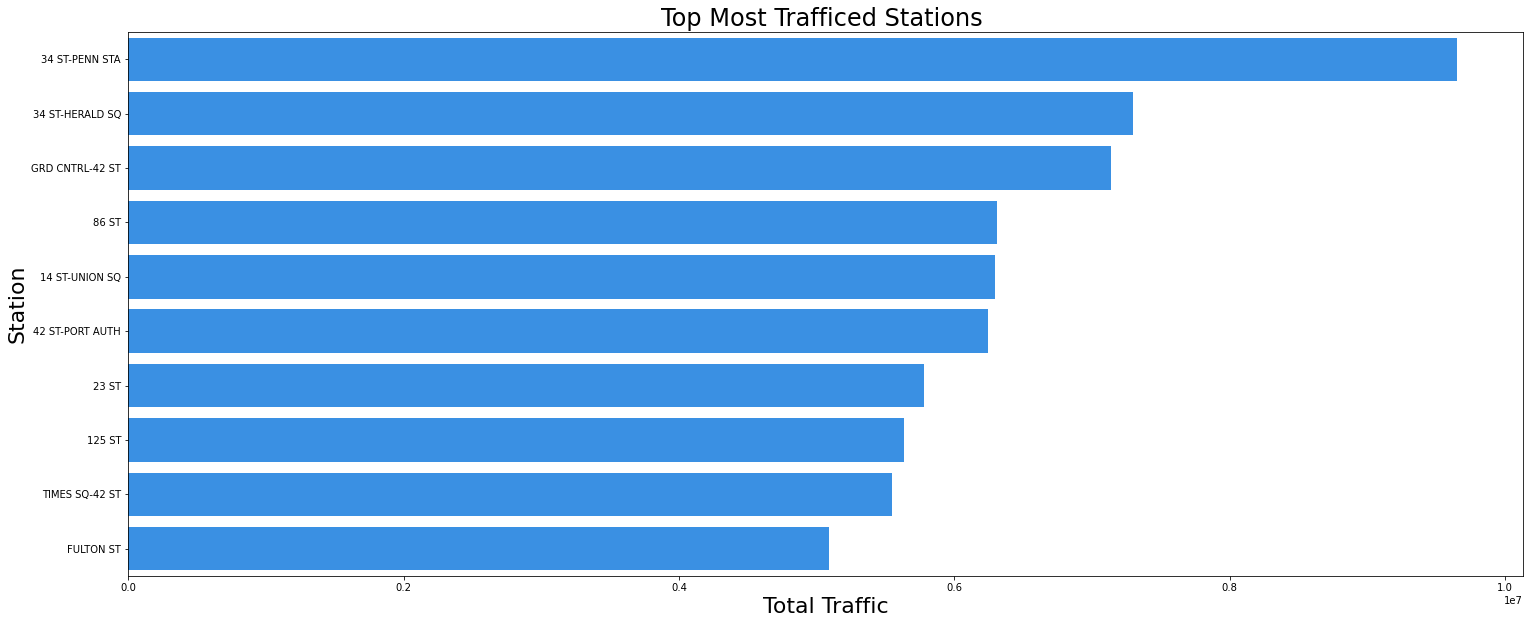

In [57]:
#barplot for the top 10 most trafficed stations
stations_totals = dailytraffic_df.groupby('STATION', as_index=False).DAILY_TRAFFIC.sum()
stations_totals.rename(columns={'turn_traffic':'total_st_traffic'}, inplace=True)
stations_totals.sort_values(by='DAILY_TRAFFIC', ascending=False, inplace=True)

plt.figure(figsize=[25,10])
sns.barplot(x='DAILY_TRAFFIC', y='STATION', data=stations_totals[:10], color='dodgerblue')
plt.title('Top Most Trafficed Stations ', fontsize=24)
plt.xlabel('Total Traffic', fontsize=22)
plt.ylabel('Station', fontsize=22);

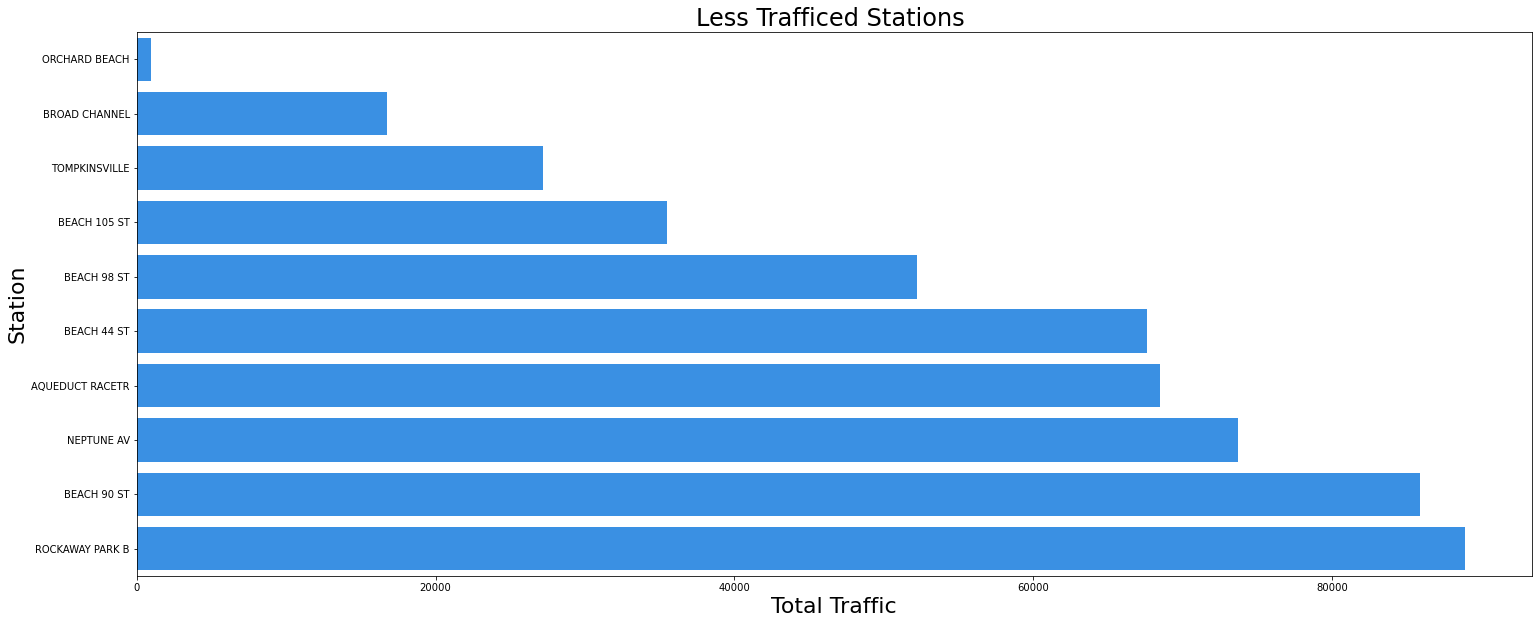

In [58]:
#barplot for the top 10 less trafficed stations

stations_totals2 = dailytraffic_df.groupby('STATION', as_index=False).DAILY_TRAFFIC.sum()
stations_totals2.rename(columns={'turn_traffic':'total_st_traffic'}, inplace=True)
stations_totals2.sort_values(by='DAILY_TRAFFIC', ascending=True, inplace=True)

plt.figure(figsize=[25,10])
sns.barplot(x='DAILY_TRAFFIC', y='STATION', data=stations_totals2[:10], color='dodgerblue')
plt.title('Less Trafficed Stations ', fontsize=24)
plt.xlabel('Total Traffic', fontsize=22)
plt.ylabel('Station', fontsize=22);

<ipython-input-59-71f658336bfa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailytraffic_df['WEEKDAY'] = dailytraffic_df['DATETIME'].dt.day_name()


Text(0.5, 1.0, 'Station Traffic in the Week')

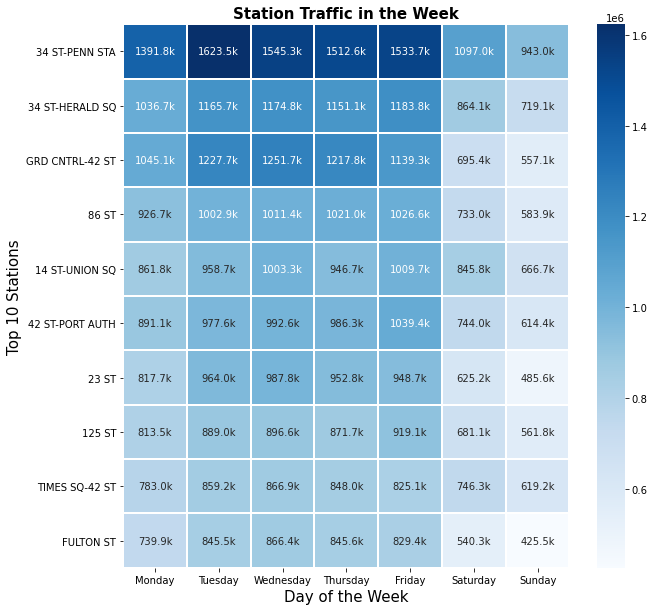

In [59]:
#heat map for the station traffic over week (top 10 station)
group_station = dailytraffic_df.groupby('STATION')['DAILY_TRAFFIC'].sum().sort_values(ascending=False)
#https://towardsdatascience.com/mta-turnstile-traffic-analysis-to-optimize-street-engagements-a7391adc4d45
dailytraffic_df = dailytraffic_df[dailytraffic_df['STATION'].isin(list(group_station.head(10).index))]
dailytraffic_df['WEEKDAY'] = dailytraffic_df['DATETIME'].dt.day_name()
group_station_day = dailytraffic_df.groupby(['STATION','WEEKDAY'])['DAILY_TRAFFIC'].sum()
matrix_station_day = group_station_day.unstack()
matrix_station_day.reset_index()
matrix_station_day = matrix_station_day.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
matrix_station_day = matrix_station_day.reindex(index=list(group_station.head(10).index))

array = np.array(matrix_station_day.applymap(lambda x:str(round(x/1000,1))+'k'))
fig2 = plt.figure(figsize=[10,10])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax2 = sns.heatmap(matrix_station_day,cmap='Blues',linecolor='white',linewidths=1,annot = array,fmt='')
plt.xlabel('Day of the Week',fontsize=15)
plt.ylabel('Top 10 Stations',fontsize=15)   
plt.title('Station Traffic in the Week',weight='bold',fontsize=15)

Text(0.5, 1.0, 'Station Traffic in the day')

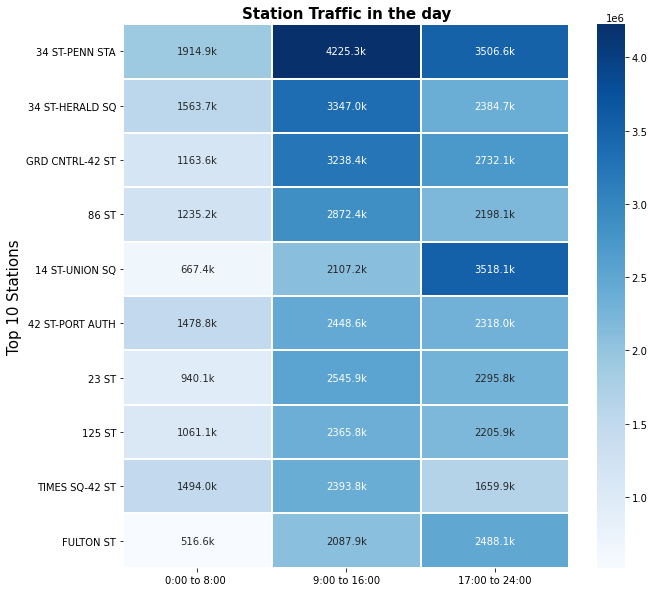

In [60]:
#heat map for the station traffic over day (top 10 station)

#https://towardsdatascience.com/mta-turnstile-traffic-analysis-to-optimize-street-engagements-a7391adc4d45
dailytraffic_df = dailytraffic_df[dailytraffic_df['STATION'].isin(list(group_station.head(10).index))]
#dailytraffic_df['WEEKDAY'] = dailytraffic_df['DATETIME'].dt.day_name()
group_station_day = dailytraffic_df.groupby(['STATION','TIME_INTERVAL'])['DAILY_TRAFFIC'].sum()
matrix_station_day = group_station_day.unstack()
matrix_station_day.reset_index()
matrix_station_day = matrix_station_day.reindex(columns=["0:00 to 8:00 ","9:00 to 16:00","17:00 to 24:00"])
matrix_station_day = matrix_station_day.reindex(index=list(group_station.head(10).index))

array = np.array(matrix_station_day.applymap(lambda x:str(round(x/1000,1))+'k'))
fig2 = plt.figure(figsize=[10,10])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax2 = sns.heatmap(matrix_station_day,cmap='Blues',linecolor='white',linewidths=1,annot = array,fmt='')
plt.xlabel('',fontsize=15)
plt.ylabel('Top 10 Stations',fontsize=15)   
plt.title('Station Traffic in the day',weight='bold',fontsize=15)

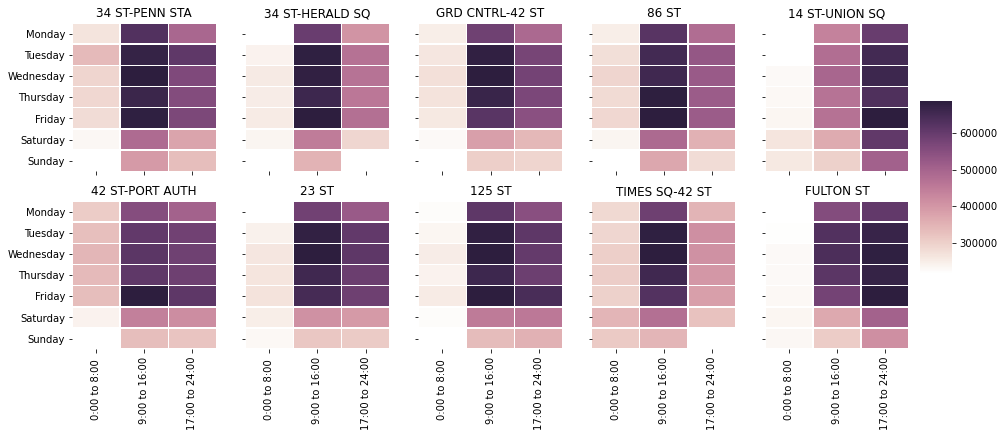

In [61]:
#heat map for the station traffic over day (top 10 station)
matrix_list= []
for station in list(group_station.head(10).index):
    df_station = dailytraffic_df[dailytraffic_df['STATION']==station]
    group_day_time = df_station.groupby(['WEEKDAY','TIME_INTERVAL'])['DAILY_TRAFFIC'].sum()
    matrix_day_time = group_day_time.unstack()
    matrix_day_time.reset_index()   
    matrix_day_time = matrix_day_time.reindex(index=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
    matrix_day_time = matrix_day_time.reindex(columns=["0:00 to 8:00 ","9:00 to 16:00","17:00 to 24:00"])
    matrix_list.append(matrix_day_time)

fig, axn = plt.subplots(2,5, sharex=True, sharey=True, figsize=(15,6))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  

for i, ax in enumerate(axn.flat):
    station = matrix_list[i]
    sns.heatmap(station, ax=ax, cmap=cmap,
                cbar=i == 0,
                cbar_ax=None if i else cbar_ax,
                linecolor='white',linewidths=0.5)
    ax.set_title(list(group_station.head(10).index)[i])
    ax.set_xlabel('')
    ax.set_ylabel('')